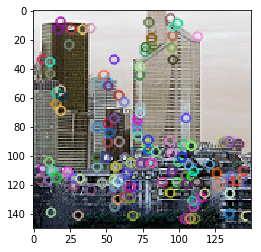

In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

train_data_dir = "X:/train-scene classification/data/train/"

img = cv2.imread(os.path.join(train_data_dir, '0_buildings', '1623.jpg'))
# gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
img_out = np.copy(img)
kp = sift.detect(img,None)

# img=cv2.drawKeypoints(img,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img=cv2.drawKeypoints(img,kp, img_out)
# img=cv2.drawKeypoints()
plt.imshow(img)

# cv2.imwrite('sift_keypoints.jpg',img)

In [11]:
print(type(kp))

<class 'list'>


In [14]:
cv2.KeyPoint()

<class 'cv2.KeyPoint'>


In [16]:
from sklearn.metrics.pairwise import cosine_similarity as cs

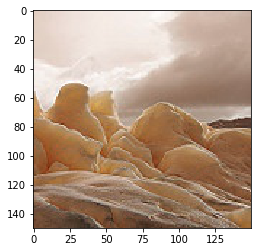

In [62]:
img1 = cv2.imread(os.path.join(train_data_dir, '0_buildings', '1623.jpg'))
img2 = cv2.imread(os.path.join(train_data_dir, '2_glacier', '67.jpg'))
img3 = cv2.imread(os.path.join(train_data_dir, '2_glacier', '10.jpg'))
plt.imshow(img2)

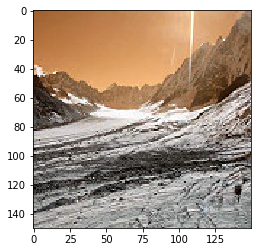

In [63]:
plt.imshow(img3)

In [49]:
def _sift(img):
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(img,None)
    print(len(kp))
    res_list = []
    for key_pt in kp:
        res_list.append([key_pt.pt[0], key_pt.pt[1]])
    return np.array(res_list)

In [50]:
def _cosine_similarity(img1, img2, use_sift = False):
    if use_sift:
        img1_sift = _sift(img1)
        img2_sift = _sift(img2)
        return cs(img1_sift, img2_sift)
    else:
        gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
        gray1 = np.reshape(gray1, (1, 150 * 150))
        gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
        gray2 = np.reshape(gray2, (1, 150 * 150))
        return cs(gray1, gray2)

In [64]:
_cs = _cosine_similarity(img1, img2)
_cs_out = _cosine_similarity(img2, img3)

In [65]:
print(_cs_out)

[[0.86973509]]


In [53]:
_cs = _cosine_similarity(img1, img2, True)
_cs_out = _cosine_similarity(img1, img3, True)

167
222
167
251


In [48]:
print(_cs.shape)
print(_cs_out.shape)

(167, 222)
(167, 251)
